In [2]:
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories
%pylab inline
from importing_modules import *
# pyomo.environ as oe, seaborn as sns, plotly.plotly as py, plotly.graph_objs as go
# from util.gjh_wrapper import gjh_solve, make_df, from vis import acres_bars, zL_bars

Populating the interactive namespace from numpy and matplotlib


#### Load Solution Sequence

In [3]:
filename = 'output/costobj_tausequence_alldfs_ipopt_2018-07-30_142259.csv'
df_costobj = pd.read_csv(os.path.join(projectpath, filename))

filename = 'output/loadobj_costboundsequence_alldfs_ipopt_2018-07-30_133209.csv'
df_loadobj = pd.read_csv(os.path.join(projectpath, filename))

#### Pivot table for acres

In [5]:
# COST OBJECTIVE
df_piv = df_costobj.pivot(index='tau', columns='x', values='acres')
df_piv.reset_index(level=['tau'], inplace=True)  # make tau into a regular column
df_piv['range']=df_piv.drop('tau', axis=1).apply(lambda x : list((0, int(math.ceil(np.nanmax(x))+1))), 1)
df_piv['objective'] = df_piv['tau'].map(dict(zip(df_costobj.tau, df_costobj.solution_objectives)))  # solution_objectives
df_piv_costobj = df_piv.copy()


# LOAD OBJECTIVE
df_piv = df_loadobj.pivot(index='totalcostupperbound', columns='x', values='acres')
df_piv.reset_index(level=['totalcostupperbound'], inplace=True)  # make tau into a regular column
df_piv['range']=df_piv.drop('totalcostupperbound', axis=1).apply(lambda x : list((0, int(math.ceil(np.nanmax(x))+1))), 1)
df_piv['objective'] = df_piv['totalcostupperbound'].map(dict(zip(df_loadobj.totalcostupperbound, df_loadobj.solution_objectives)))  # solution_objectives
df_piv_loadobj = df_piv.copy()

# Visualizations

50
["('ConPlan', 'N42071SL2_2410_2700', 'pas', 1.94)", "('CoverCropTradRED', 'N42071SL2_2410_2700', 'gwm', 68.94)", "('CoverCropTradRED', 'N42071SL2_2410_2700', 'swm', 68.94)", "('HRTill', 'N42071SL2_2410_2700', 'dbl', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'gom', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'gwm', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'oac', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'sch', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'scl', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'sgg', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'som', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'soy', 0.0)", "('HRTill', 'N42071SL2_2410_2700', 'swm', 0.0)", "('UrbanNMPlanHR', 'N42071SL2_2410_2700', 'mch', 0.0)", "('UrbanNMPlanHR', 'N42071SL2_2410_2700', 'mcn', 0.0)", "('UrbanNMPlanHR', 'N42071SL2_2410_2700', 'mtg', 0.0)", "('UrbanNMPlanHR', 'N42071SL2_2410_2700', 'nch', 0.0)", "('UrbanNMPlanHR', 'N42071SL2_2410_2700', 'ntg', 0.0)", "('WaterContStruc', 'N42071SL2_2410_2700', 'pas', 17.

IndexError: too many indices for array

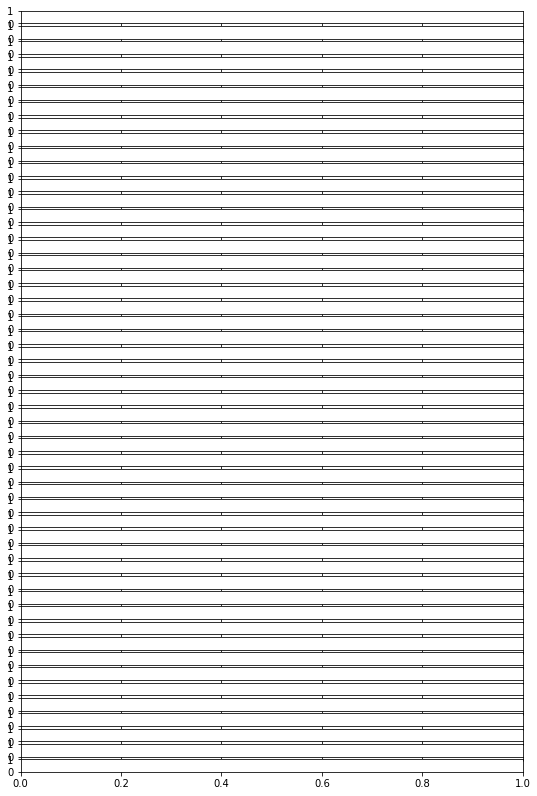

In [11]:
loadplotdf = df_piv_loadobj[df_piv_loadobj.columns.difference(['totalcostupperbound', 'range', 'objective'])]
costplotdf = df_piv_costobj[df_piv_costobj.columns.difference(['tau', 'range', 'objective'])]

varnum = max([loadplotdf.shape[1], costplotdf.shape[1]])
print(varnum)
print(list(loadplotdf.columns))
columnnames = set(list(loadplotdf.columns) + list(costplotdf.columns))
print(len(columnnames))

fig, axes = plt.subplots(varnum, 1, sharex=True, figsize=(9, 14))

for counter, columnname in enumerate(columnnames):
    print(counter)
    ax = axes[counter, 0]
    
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(color='#D3D3D3', linestyle='-', linewidth=1)
    
    ax.plot(df_piv['totalcostupperbound'], df_piv[columnname].round(2))
    
    ax.set_ylabel(str(columnname), rotation=0, horizontalalignment='right')
    
df_toplot = df_g_piv[df_g_piv.columns.difference(['totalcostupperbound', 'range', 'objective'])]
varnum = df_toplot.shape[1]

# maxv = np.nanmax(df_toplot.values)
# for counter, columnname in enumerate(df_toplot):
#     ax = axes[counter, 1]
    
#     ax.set_ylim([0,maxv])
    
# #     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
# #     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.tick_params(axis=u'both', which=u'both',length=0)
#     ax.grid(color='#D3D3D3', linestyle='-', linewidth=1)
    
#     ax.plot(df_piv['totalcostupperbound'], df_g_piv[columnname])
    
# #     ax.set_ylabel(str(columnname), rotation=0, horizontalalignment='right')